# R Consortium ISC Grants
## TidyTuesday Week-08

## Libraries and Data

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [7]:
url_data = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-20/isc_grants.csv"
raw  = pd.read_csv(url_data)

## Fonts and Colors

In [81]:
import textwrap

def wrap_xlabels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)


def wrap_ylabels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [3]:

from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
from matplotlib import rcParams
#rcParams['axes.spines.top'] = False
#rcParams['axes.spines.right'] = False
rcParams['font.family'] = 'Roboto'
rcParams['font.size'] = '12'

## Data Wrangling

In [8]:
raw.head(3)

,year,group,title,funded,proposed_by,summary,website
0,2023,1,The future of DBI (extension 1),10000,Kirill Müller,This proposal mostly focuses on the maintenanc...,NaN
1,2023,1,Secure TLS Communications for R,10000,Charlie Gao,The project aims to implement secure connectio...,NaN
2,2023,1,volcalc: Calculate predicted volatility of che...,12265,Kristina Riemer,This ISC funded project focuses on the develop...,NaN


In [9]:
raw.describe()

,year,group,funded
count,85.000000,85.000000,85.000000
mean,2019.141176,1.400000,13781.141176
std,2.082540,0.492805,11325.802194
min,2016.000000,1.000000,0.000000
25%,2017.000000,1.000000,6000.000000
50%,2019.000000,1.000000,10000.000000
75%,2021.000000,2.000000,16000.000000
max,2023.000000,2.000000,62400.000000


In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         85 non-null     int64 
 1   group        85 non-null     int64 
 2   title        85 non-null     object
 3   funded       85 non-null     int64 
 4   proposed_by  85 non-null     object
 5   summary      85 non-null     object
 6   website      52 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.8+ KB


In [12]:
raw.columns

Index(['year', 'group', 'title', 'funded', 'proposed_by', 'summary',
       'website'],
      dtype='object')

In [15]:
dff = raw.loc[:, ['year', 'group', 'title', 'funded', 'proposed_by']]
dff.head(3)

,year,group,title,funded,proposed_by
0,2023,1,The future of DBI (extension 1),10000,Kirill Müller
1,2023,1,Secure TLS Communications for R,10000,Charlie Gao
2,2023,1,volcalc: Calculate predicted volatility of che...,12265,Kristina Riemer


In [18]:
df  =  dff.rename(columns={'group' : 'cycle', 'funded':'amount', 'proposed_by':'requester'})
df['cycle'] = np.where(df['cycle'] == 1, 'Spring', 'Fall')
df.head(3)

,year,cycle,title,amount,requester
0,2023,Spring,The future of DBI (extension 1),10000,Kirill Müller
1,2023,Spring,Secure TLS Communications for R,10000,Charlie Gao
2,2023,Spring,volcalc: Calculate predicted volatility of che...,12265,Kristina Riemer


## Dataviz

### Average  funding amount per year

<Axes: title={'center': 'Average Funding By  Year'}, xlabel='year'>

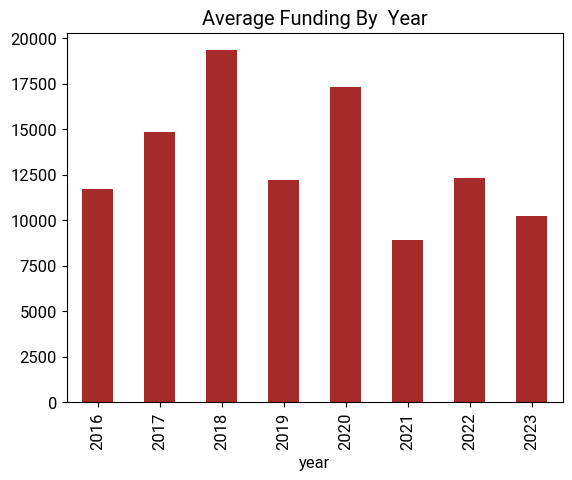

In [25]:
df.groupby('year')['amount'].mean().plot(kind = 'bar', color = 'brown', title = 'Average funding by  year')

### Average Funding By cycle

In [52]:
bycycle = df.groupby(['year', 'cycle'])['amount'].mean().reset_index()

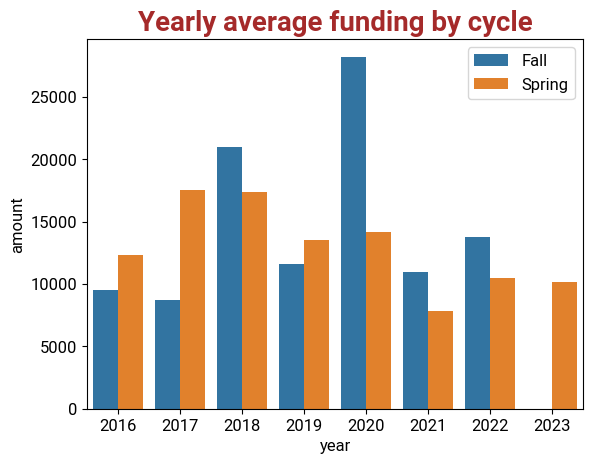

In [67]:
fig, ax = plt.subplots()

sns.barplot(bycycle, x='year', hue='cycle', y='amount')
ax.set_title('Yearly average funding by cycle', color='brown', fontsize = 20, fontweight='bold')
ax.legend_.set_title(None)
#plt.legend(fontsize='small', title_fontsize='12', title = 'Funding cycle')
plt.show()

### Most Funded Projects: Top 20

In [72]:
d20  = df.loc[:, ['title', 'requester', 'amount', 'year']].sort_values('amount', ascending=False).head(20)

/var/folders/9w/v257qsg5293f6s1lh74pbb6m0000gn/T/ipykernel_18172/2898263487.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, rotation=0)


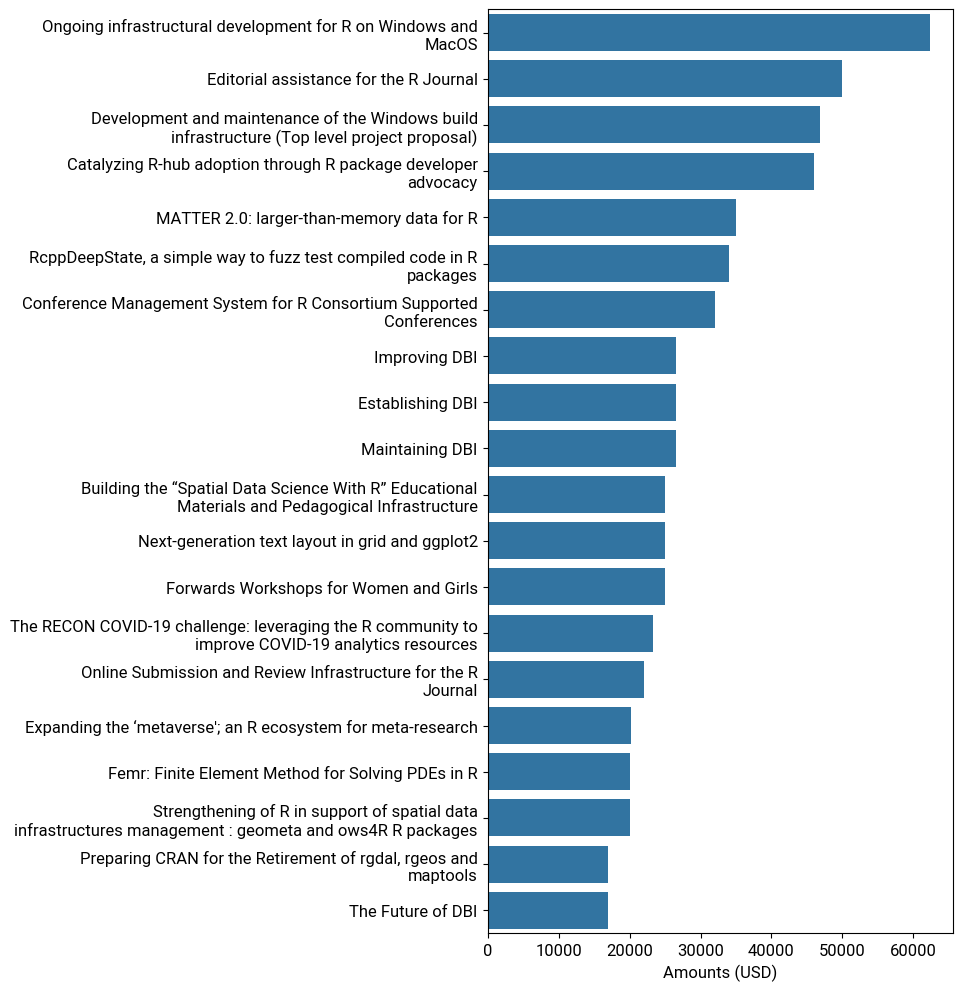

In [163]:
fig, ax = plt.subplots(figsize=(6,12))
ax = sns.barplot(d20, x='amount', y='title')
ax.set_ylabel(None)
ax.set_xlabel('Amounts (USD)')
wrap_ylabels(ax, 60)
plt.show()

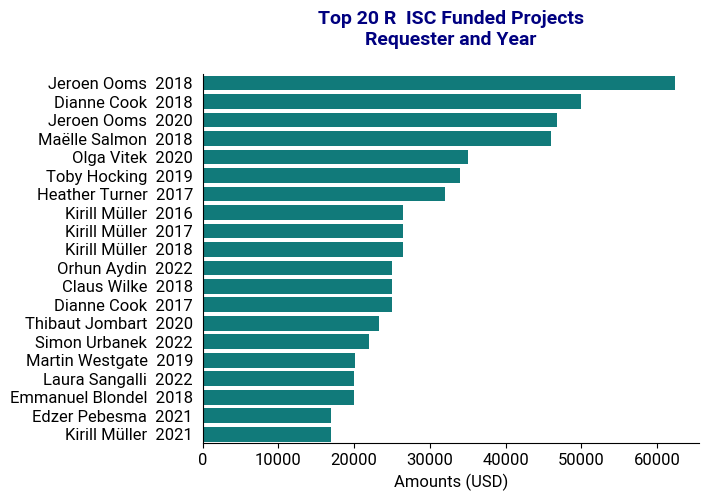

In [164]:
d20['year_name'] = d20['requester'] + '  ' + d20['year'].astype(str) 
#df['Combined'] = df[['Column1', 'Column2']].agg(''.join, axis=1)

fig, ax = plt.subplots()
ax = sns.barplot(d20, x='amount', y='year_name', color='darkcyan')
ax.set_title('Top 20 R  ISC Funded Projects\nRequester and Year\n',  color='navy', fontsize = 14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)
#ax.tick_params(axis='both', which='both', length=0)
#ax.set(xticks=[]) removes labels + ticks
ax.set_ylabel(None)
ax.set_xlabel('Amounts (USD)')
plt.show()

### Adding Annotation  to barplot

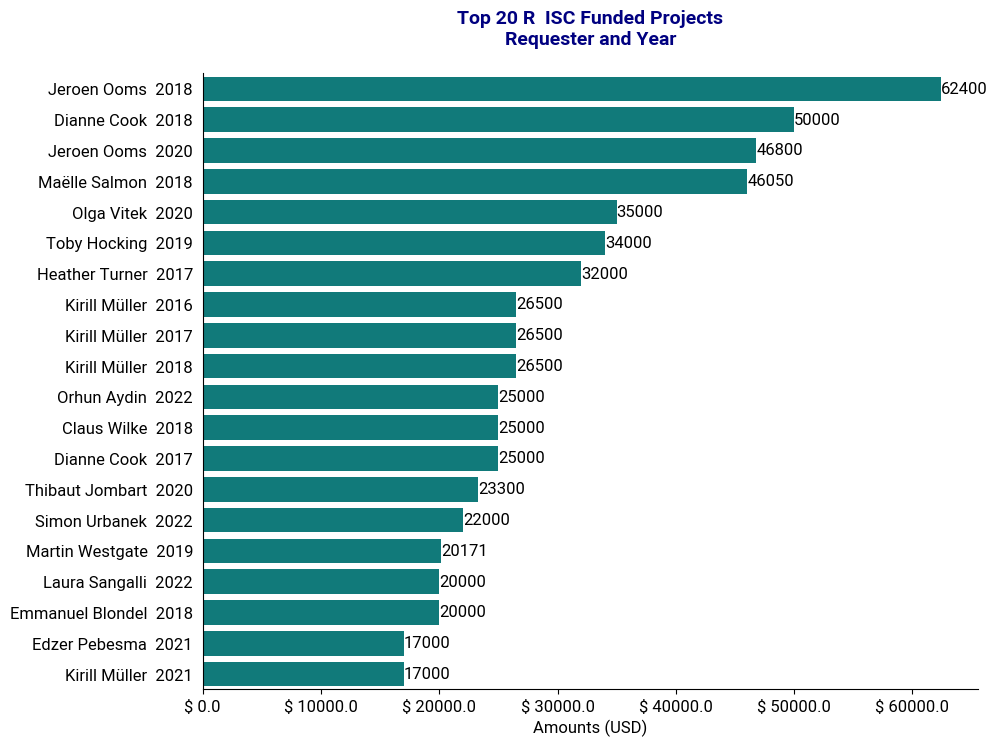

In [165]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(d20, x='amount', y='year_name', color='darkcyan')
ax.set_title('Top 20 R  ISC Funded Projects\nRequester and Year\n',  color='navy', fontsize = 14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)
ax.bar_label(ax.containers[0])
ax.set_ylabel(None)
ax.set_xlabel('Amounts (USD)')
ax.xaxis.set_major_formatter('$ {x:1.1f}')
plt.show()